In [6]:
#Q.1
# Open the wikipedia page https://en.wikipedia.org/wiki/Saturn
# 1. Scrap the web and find top 10 nouns from the page
# 2. Print all the unique verbs in their root form.
# 3. Extract all the <DT><JJ><NN> phrases from the article.
# 4. Summarize the text using TextRank Algorithm
# 5. Summarize the text using extractive summarization


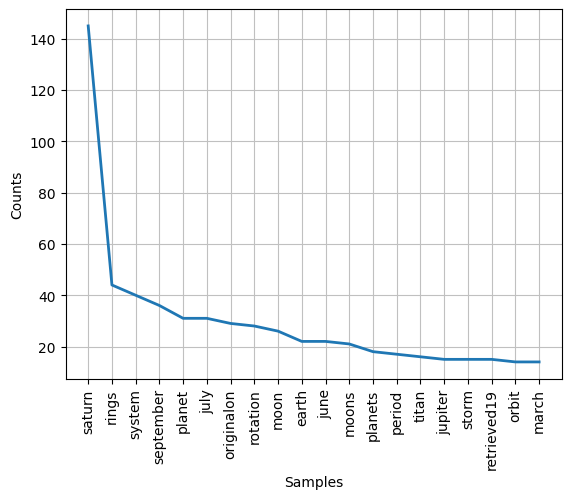

[('saturn', 145),
 ('rings', 44),
 ('system', 40),
 ('september', 36),
 ('planet', 31),
 ('july', 31),
 ('originalon', 29),
 ('rotation', 28),
 ('moon', 26),
 ('earth', 22)]

In [7]:
# 1. Scrap the web and find top 10 nouns from the page
from urllib.request import urlopen
from nltk.corpus import stopwords
swords =  stopwords.words('english')
import bs4
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk import pos_tag


from nltk.corpus import stopwords
swords =  stopwords.words('english')
url = urlopen('https://en.wikipedia.org/wiki/Saturn')
data =url.read()
soup  = BeautifulSoup(data, 'html.parser')
text = soup.get_text(strip=True)
tokens = word_tokenize(text)
tokens1 = [token for token in tokens if token.lower() not in swords]
tokens2  =  [token.lower() for token in tokens1  if token.isalnum()]
tags = pos_tag(tokens2)
## Print only noun
noun = [word for word, pos in tags if 'NN' in pos]
#tokens =   word_tokenize(text)
freq =   FreqDist(noun)
freq.plot(20)
freq.most_common(10)




In [8]:
# 2. Print all the unique verbs in their root form.

tags = pos_tag(tokens2)
## Print only verb
verb = [word for word, pos in tags if 'VB' in pos]
unique_verbs = set(verb)
print("Unique Verbs (Root Form):", unique_verbs)


Unique Verbs (Root Form): {'saturnpastflybyspioneer', 'modeling', 'dyches', 'winds', 'celebrated', 'hiding', 'miriam', 'known', 'condensed', 'supports', 'descending', 'oblate', 'working', 'conducted', 'surface', 'scaled', 'angled', 'carried', 'km', 'planned', 'completed', 'coordinates', 'extremes', 'consists', 'described', 'becomes', 'appear', 'designated', 'detected', 'surrounded', 'locked', 'charnoz', 'herscheldiscovered', 'historytoolstoolsmove', 'smiledin', 'destroyed', 'deflecting', 'mass', 'is10h32m35s', 'lake', 'sigils', 'placed', 'almanac', 'extending', 'containing', 'based', 'saturnartist', 'flyby', 'discovered', 'suspected', 'including', 'seas', 'missing', 'least', 'edits', 'windows', 'written', 'sent', 'imaging', 'dated', 'atmospheric', 'longitude', 'acquired', 'mixture', 'listarticles', 'confirmed', 'orparticipating', 'latitudes', 'classify', 'sites', 'december', 'icy', 'david', 'thought', 'thatcassinihad', 'slowing', 'believed', 'finds', 'voyager', 'compared', 'called', 'l

In [14]:
# 3. Extract all the <DT><JJ><NN> phrases from the article.

from nltk.tokenize import word_tokenize
from nltk import pos_tag,RegexpParser

grammar  = "NP:{<DT><JJ><NN>}"
chunk_parser = RegexpParser(grammar)
tags   =  pos_tag(word_tokenize(text))
tags

[('Saturn', 'NNP'),
 ('-', ':'),
 ('WikipediaJump', 'NN'),
 ('to', 'TO'),
 ('contentMain', 'VB'),
 ('menuMain', 'RB'),
 ('menumove', 'VB'),
 ('to', 'TO'),
 ('sidebarhideNavigationMain', 'VB'),
 ('pageContentsCurrent', 'JJ'),
 ('eventsRandom', 'NN'),
 ('articleAbout', 'IN'),
 ('WikipediaContact', 'NNP'),
 ('usDonateContributeHelpLearn', 'VBP'),
 ('to', 'TO'),
 ('editCommunity', 'VB'),
 ('portalRecent', 'JJ'),
 ('changesUpload', 'NN'),
 ('fileSearchSearchCreate', 'NN'),
 ('accountLog', 'IN'),
 ('inPersonal', 'JJ'),
 ('toolsCreate', 'NN'),
 ('accountLog', 'NN'),
 ('inPages', 'NNS'),
 ('for', 'IN'),
 ('logged', 'VBN'),
 ('out', 'RP'),
 ('editorslearn', 'JJ'),
 ('moreContributionsTalkContentsmove', 'NN'),
 ('to', 'TO'),
 ('sidebarhide', 'VB'),
 ('(', '('),
 ('Top', 'NNP'),
 (')', ')'),
 ('1Name', 'CD'),
 ('and', 'CC'),
 ('symbol2Physical', 'JJ'),
 ('characteristicsToggle', 'NN'),
 ('Physical', 'NNP'),
 ('characteristics', 'NNS'),
 ('subsection2.1Internal', 'JJ'),
 ('structure2.2Atmosphere2.

In [18]:
# 4. Summarize the text using TextRank Algorithm

# Import the calss

from sumy.summarizers.text_rank import TextRankSummarizer
# Import parser  and tokenization
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

from nltk.tokenize import sent_tokenize
sents = sent_tokenize(text)
len(sents)

722

In [19]:
sents

["Saturn - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonateContributeHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchCreate accountLog inPersonal toolsCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Name and symbol2Physical characteristicsToggle Physical characteristics subsection2.1Internal structure2.2Atmosphere2.2.1Cloud layers2.2.2Hexagonal cloud patterns2.3Magnetosphere3Orbit and rotation4Natural satellites5Planetary rings6History of observation and explorationToggle History of observation and exploration subsection6.1Pre-telescopic observation6.2Telescopic pre-spaceflight observations6.3Spaceflight missions6.3.1Pioneer 11flyby6.3.2Voyagerflybys6.3.3Cassini–Huygensspacecraft6.3.4Possible future missions7Observation8See also9Notes10References11Further reading12External linksToggle the table of contentsSa

In [20]:
# Intializer the parser
my_parser = PlaintextParser.from_string(text, Tokenizer('english'))

# Create the object of summarization
text_rank_summarizer = TextRankSummarizer()
# Extract top 3 sentence
summary = text_rank_summarizer(my_parser.document, sentences_count = 3)

for sent in summary:
    print(sent, '\n')

At least146 moons[32]are known to orbit the planet, of which 63 are officially named; this does not include the hundreds ofmoonletsin its rings.Titan, Saturn's largest moon and the second largest in the Solar System, is larger (while less massive) than the planetMercuryand is the only moon in the Solar System to have a substantial atmosphere. 

[146]Telescopic pre-spaceflight observationsGalileo Galileiobserved the rings of Saturn in 1610, but was unable to determine what they were.Robert Hookenoted the shadows (aandb) cast by both the globe and the rings on each other in this drawing of Saturn in 1666.Saturn's rings require at least a 15-mm-diametertelescope[150]to resolve and thus were not known to exist untilChristiaan Huygenssaw them in 1655 and published about this in 1659.Galileo, with his primitive telescope in 1610,[151][152]incorrectly thought of Saturn's appearing not quite round as two moons on Saturn's sides. 

The Moon's orbit is inclined by several degrees relative to Sat

In [21]:
# 5. Summarize the text using extractive summarization

# Import  the clsass
from sumy.summarizers.lsa import LsaSummarizer
# Create the object of summarization
lsa_summarozation = LsaSummarizer()
# Intialization the parser
my_parser = PlaintextParser.from_string(text, Tokenizer('english'))
# Extract top 3 sentence
summary = lsa_summarozation(my_parser.document, sentences_count=3)
for sent in summary:
    print(sent, '\n')

[47][48][49]Saturn has a hot interior, reaching 11,700 °C (21,100 °F) at its core, and radiates 2.5 times more energy into space than it receives from the Sun. 

Jupiter'sthermal energyis generated by theKelvin–Helmholtz mechanismof slowgravitational compression, but such a process alone may not be sufficient to explain heat production for Saturn, because it is less massive. 

)CharikloanChironeanUranianNeptunianHaumeanQuaoarianSmallSolarSystembodiesCometsDamocloidsMeteoroidsMinor planetsnames and meaningsmoonsPlanetesimalPlanetary orbit-crossing minor planetsMercuryVenusEarthMarsJupiterSaturnUranusNeptuneTrojansVenusEarthMarsJupiterTrojan campGreek campSaturn MoonsUranusNeptuneNear-Earth objectsAsteroid beltAsteroidsCeresVestaPallasHygieaactivefirst 1000familiesPHAexceptionalKirkwood gapCentaursNeptune trojansTrans-Neptunian objectsKuiper beltCubewanosPlutinosDetached objectsSednoidsScattered discOort cloudHills cloudHypotheticalobjectsFifth giantNemesisPhaetonPlanet NinePlanet VPlane